In [ ]:
max_len_str = 96

In [ ]:
import tensorflow as tf

input_shape = (max_len_str, 28, 28, 1)

inputs = tf.keras.layers.Input(shape=input_shape)

conv1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))(inputs)
max_pool1 = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))(conv1)
conv2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))(max_pool1)
max_pool2 = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))(conv2)

flatten = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(max_pool2)

fc1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=128, activation='relu'))(flatten)
cnn_output = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=128, activation='linear'))(fc1)
lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True))(cnn_output)

lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64))(lstm1)

output = tf.keras.layers.Dense(units=7, activation='softmax')(lstm2)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import tensorflow as tf

input_shape = (max_len_str, 28, 28, 1)

inputs = tf.keras.layers.Input(shape=input_shape)

conv1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))(inputs)
max_pool1 = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))(conv1)
conv2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))(max_pool1)
max_pool2 = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))(conv2)

flatten = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(max_pool2)

fc1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=128, activation='relu'))(flatten)
cnn_output = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=128, activation='linear'))(fc1)
lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True))(cnn_output)

lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64))(lstm1)

output = tf.keras.layers.Dense(units=7, activation='softmax')(lstm2)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/SignLanguageData/my_model.h5')

In [ ]:
history = model.fit(x=train_text_sign_array, y=train_labels, validation_data=(dev_text_sign_array, dev_labels), epochs=5)

Epoch 1/5
157/157 [==============================] - 34s 108ms/step - loss: 0.4597 - accuracy: 0.8380 - val_loss: 0.8022 - val_accuracy: 0.7350
Epoch 2/5
157/157 [==============================] - 14s 88ms/step - loss: 0.3785 - accuracy: 0.8668 - val_loss: 0.7164 - val_accuracy: 0.7725
Epoch 3/5
157/157 [==============================] - 14s 88ms/step - loss: 0.3520 - accuracy: 0.8816 - val_loss: 0.6803 - val_accuracy: 0.7825
Epoch 4/5
157/157 [==============================] - 14s 89ms/step - loss: 0.3375 - accuracy: 0.8866 - val_loss: 0.7836 - val_accuracy: 0.7775
Epoch 5/5
157/157 [==============================] - 14s 89ms/step - loss: 0.3247 - accuracy: 0.8890 - val_loss: 0.7350 - val_accuracy: 0.7650


In [ ]:
model.evaluate(test_text_sign_array,test_labels)

13/13 [==============================] - 0s 33ms/step - loss: 0.7973 - accuracy: 0.7700


[0.7972659468650818, 0.7699999809265137]

In [ ]:
model.save('/content/drive/MyDrive/SignLanguageData/my_model.h5')

##Code

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import random
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/monologg/JointBERT.git

Cloning into 'JointBERT'...
remote: Enumerating objects: 332, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 332 (delta 105), reused 95 (delta 95), pack-reused 213
Receiving objects: 100% (332/332), 487.19 KiB | 206.00 KiB/s, done.
Resolving deltas: 100% (194/194), done.


In [ ]:
import pickle
import os
if os.path.getsize('/content/drive/MyDrive/SignLanguageData/dev_data.pickle') > 0:
  with open('/content/drive/MyDrive/SignLanguageData/dev_data.pickle', 'rb') as f:
      # dev_data_dictionary = pickle.load(f)
      unpickler = pickle.Unpickler(f)
      dev_data_dictionary = unpickler.load()

f.close()
if os.path.getsize('/content/drive/MyDrive/SignLanguageData/test_data.pickle') > 0:
  with open('/content/drive/MyDrive/SignLanguageData/test_data.pickle', 'rb') as f:
      # test_data_dictionary = pickle.load(f)
      unpickler = pickle.Unpickler(f)
      test_data_dictionary = unpickler.load()


f.close()

train_data_dictionary = None


In [ ]:
def run1():
  if os.path.getsize('/content/drive/MyDrive/SignLanguageData/train_data_0-5000.pickle') > 0:
    with open('/content/drive/MyDrive/SignLanguageData/train_data_0-5000.pickle', 'rb') as f:
        # test_data_dictionary = pickle.load(f)
        unpickler = pickle.Unpickler(f)
        train_data_dictionary = unpickler.load()

  f.close()
  return train_data_dictionary


In [ ]:
def run2():
  if os.path.getsize('/content/drive/MyDrive/SignLanguageData/train_data_5000-10000.pickle') > 0:
    with open('/content/drive/MyDrive/SignLanguageData/train_data_5000-10000.pickle', 'rb') as f:
        # test_data_dictionary = pickle.load(f)
        unpickler = pickle.Unpickler(f)
        train_data_dictionary = unpickler.load()

  f.close()
  return train_data_dictionary

In [ ]:
def runn(train_data_dictionary, x):
  train_text_sign_array = train_data_dictionary['X']
  train_labels = train_data_dictionary['Y']

  dev_text_sign_array = dev_data_dictionary['X']
  dev_labels = dev_data_dictionary['Y']

  test_text_sign_array = test_data_dictionary['X']
  test_labels = test_data_dictionary['Y']

  from tensorflow import keras
  model = keras.models.load_model('/content/drive/MyDrive/SignLanguageData/my_model_' + str(x) + '.h5')


  history = model.fit(x=train_text_sign_array, y=train_labels, validation_data=(dev_text_sign_array, dev_labels), epochs=5)

  model.evaluate(test_text_sign_array,test_labels)

  model.save('/content/drive/MyDrive/SignLanguageData/my_model_' + str(x + 5) + '.h5')

In [ ]:
for i in range(2):
  if i == 0:
    train_data_dictionary = run1()
  else:
    train_data_dictionary = run2()
  runn(train_data_dictionary, 55)

Epoch 1/5
157/157 [==============================] - 34s 111ms/step - loss: 0.5207 - accuracy: 0.8202 - val_loss: 0.7689 - val_accuracy: 0.7725
Epoch 2/5
157/157 [==============================] - 14s 88ms/step - loss: 0.3735 - accuracy: 0.8692 - val_loss: 0.7613 - val_accuracy: 0.7825
Epoch 3/5
157/157 [==============================] - 14s 88ms/step - loss: 0.3240 - accuracy: 0.8860 - val_loss: 0.7110 - val_accuracy: 0.8125
Epoch 4/5
157/157 [==============================] - 14s 88ms/step - loss: 0.2807 - accuracy: 0.9044 - val_loss: 0.6638 - val_accuracy: 0.8225
Epoch 5/5
22/22 [==============================] - 1s 44ms/step - loss: 1.0506 - accuracy: 0.7286
Epoch 1/5
157/157 [==============================] - 24s 102ms/step - loss: 0.1580 - accuracy: 0.9500 - val_loss: 0.9985 - val_accuracy: 0.7300
Epoch 2/5
157/157 [==============================] - 14s 88ms/step - loss: 0.1560 - accuracy: 0.9506 - val_loss: 0.8294 - val_accuracy: 0.7750
Epoch 3/5
157/157 [=======================

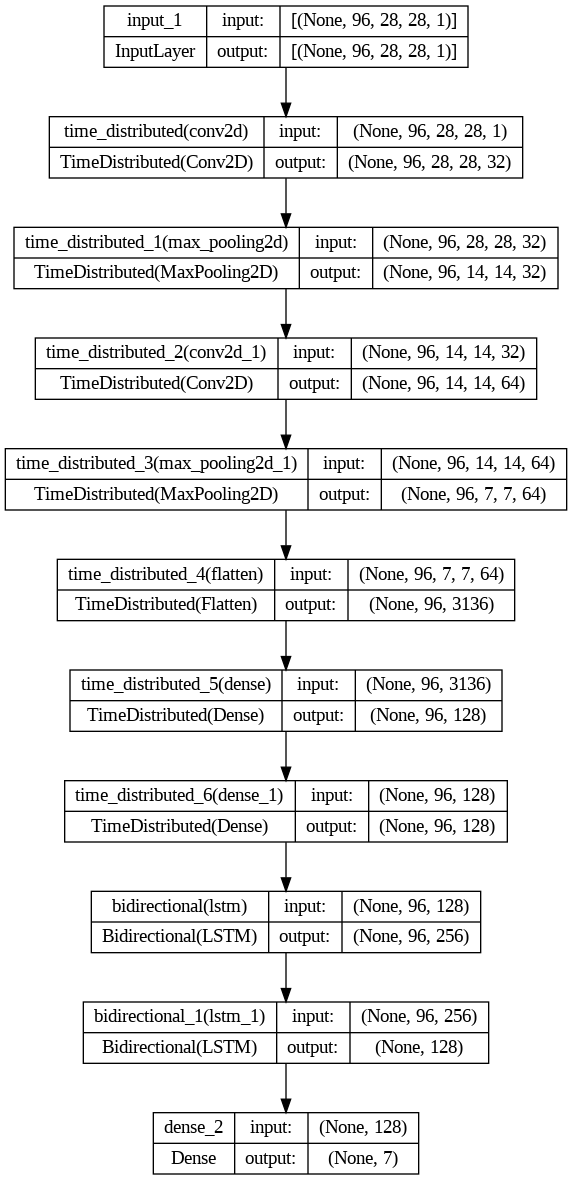

In [ ]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

In [ ]:
ord()